In [1]:
from utilities import *

I am in libs


In [2]:
%store -r x_scaled
%store -r Y

+-----------------------+--------------------------------+-------------+
| Number of Components: | Cumulative Explained Variance: | Eigenvalue: |
+-----------------------+--------------------------------+-------------+
|           1           |             0.769              |    58.041   |
|           2           |             0.824              |    4.173    |
|           3           |             0.864              |    2.988    |
|           4           |             0.886              |    1.687    |
|           5           |             0.905              |    1.456    |
|           6           |             0.921              |    1.157    |
|           7           |             0.931              |    0.806    |
|           8           |             0.939              |    0.603    |
|           9           |             0.947              |    0.554    |
|           10          |             0.953              |     0.46    |
|           11          |             0.958        

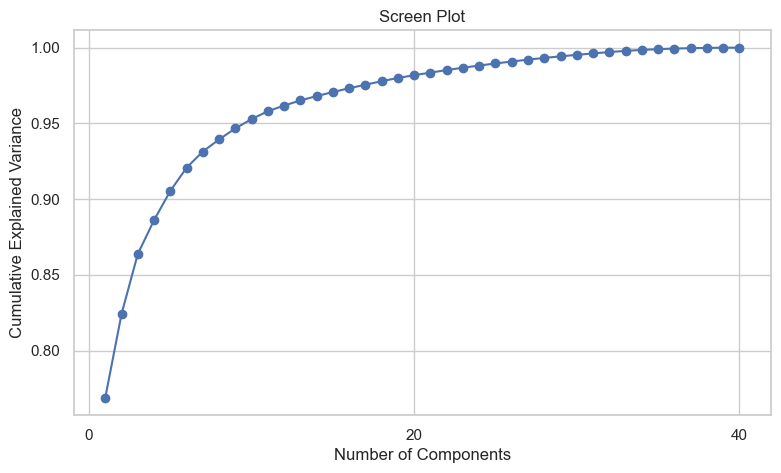

In [3]:
# Guessing less than 41 components
pca41 = PCA(n_components=40)
principalComponents = pca41.fit_transform(x_scaled)

# Creating a pretty table for results
table = [['Number of Components:','Cumulative Explained Variance:','Eigenvalue:']]
tab = PrettyTable(table[0])
for i in range(len(pca41.explained_variance_ratio_.cumsum())):
    tab.add_row([i+1,pca41.explained_variance_ratio_.cumsum()[i].round(3),
                 pca41.explained_variance_[i].round(3)])

#tab.add_rows(table[1:])
print(tab)

figure=plt.figure(figsize=(9,5))
sns.set_theme(style = "whitegrid")
plt.plot(range(1,41),pca41.explained_variance_ratio_.cumsum(),marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Screen Plot')
plt.locator_params(axis='x', nbins=4)

plt.grid(True)
plt.show()

The "elbow" on the Scree Plot appears to be around 6 or 7 principal components, indicating 6 or 7 components should be used. Kaiser's Rule instructs users to drop all components with eigenvalues under 1, indicating 6 components should be used.

Since 6 components explains > 93% of variance and choosing 6 or 7 components seemed abritrary, I decided to move forward with 6 components for the extra explained variance in this PCA.

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,Y,
                                test_size = 0.2, random_state = 7, stratify=Y['mortalité à un an'])

__________________________________________________
--------------------------------------------------
Results for: LogisticRegression
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       151
           1       0.89      0.62      0.73        50

    accuracy                           0.89       201
   macro avg       0.89      0.80      0.83       201
weighted avg       0.89      0.89      0.88       201

Training Accuracy: 0.8856
Training Recall: 0.62


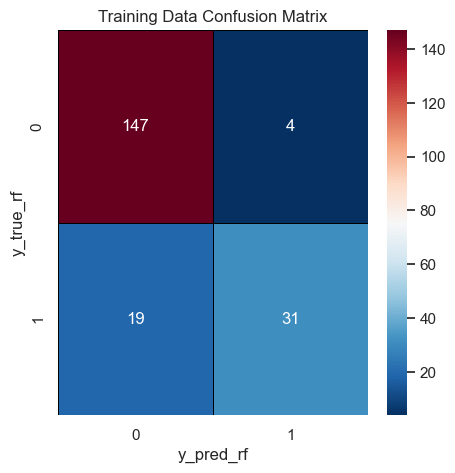

__________________________________________________
--------------------------------------------------
Results for: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       151
           1       0.88      0.42      0.57        50

    accuracy                           0.84       201
   macro avg       0.86      0.70      0.74       201
weighted avg       0.85      0.84      0.82       201

Training Accuracy: 0.8408
Training Recall: 0.42


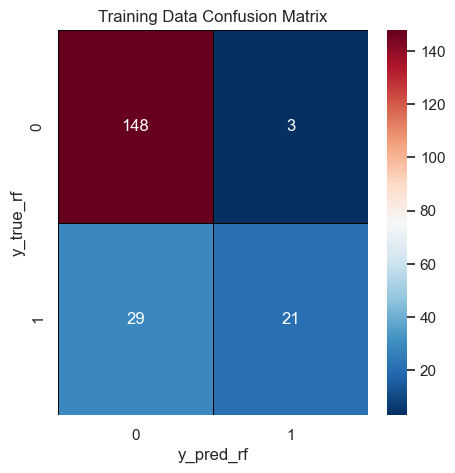

__________________________________________________
--------------------------------------------------
Results for: SVC
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       151
           1       0.97      0.56      0.71        50

    accuracy                           0.89       201
   macro avg       0.92      0.78      0.82       201
weighted avg       0.90      0.89      0.87       201

Training Accuracy: 0.8856
Training Recall: 0.56


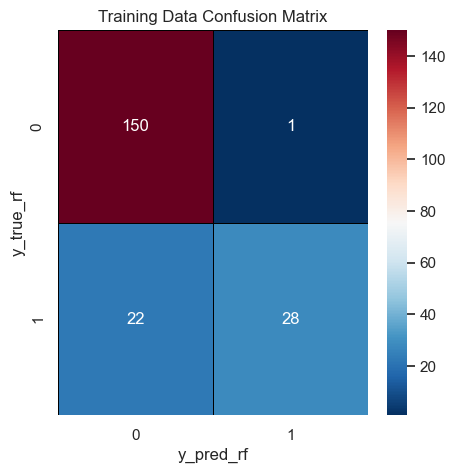

__________________________________________________
--------------------------------------------------
Results for: MLPClassifier
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       151
           1       0.91      0.58      0.71        50

    accuracy                           0.88       201
   macro avg       0.89      0.78      0.82       201
weighted avg       0.88      0.88      0.87       201

Training Accuracy: 0.8806
Training Recall: 0.58


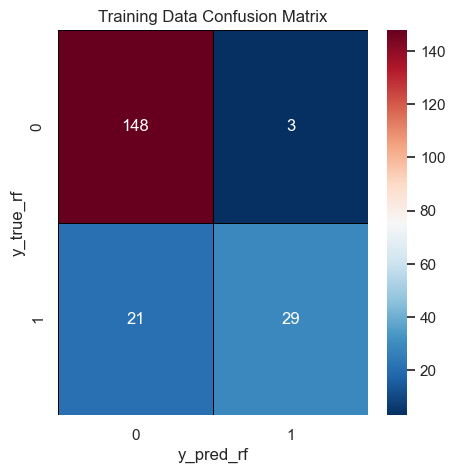

__________________________________________________
--------------------------------------------------
Results for: GaussianNB
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       151
           1       0.56      0.68      0.61        50

    accuracy                           0.79       201
   macro avg       0.72      0.75      0.73       201
weighted avg       0.80      0.79      0.79       201

Training Accuracy: 0.7861
Training Recall: 0.68


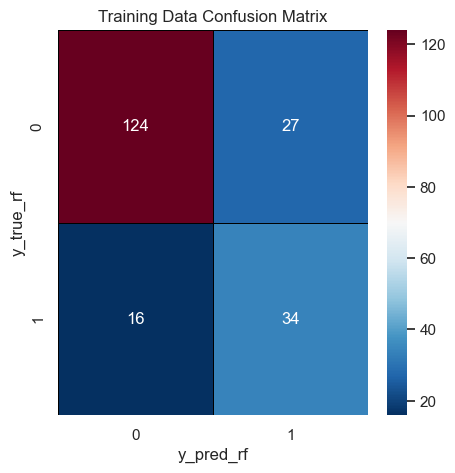

__________________________________________________
--------------------------------------------------
Results for: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


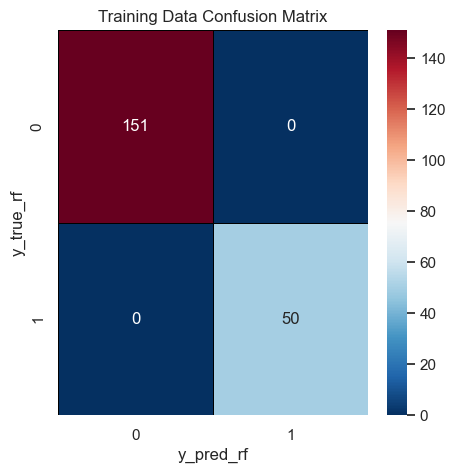

__________________________________________________
--------------------------------------------------
Results for: RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


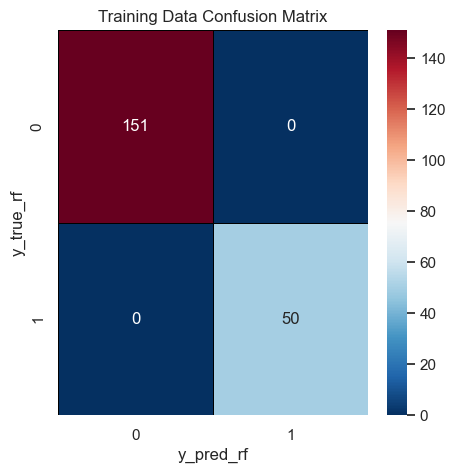

,LogisticRegression,KNeighborsClassifier,SVC,MLPClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
0,0.8856,0.8408,0.8856,0.8806,0.7861,1.0,1.0


In [43]:
showResult(classifiers,x_train,y_train['mortalité à un an'])

__________________________________________________
--------------------------------------------------
Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.79      0.87      0.82        38
           1       0.44      0.31      0.36        13

    accuracy                           0.73        51
   macro avg       0.62      0.59      0.59        51
weighted avg       0.70      0.73      0.71        51

Test Accuracy: 72.55%


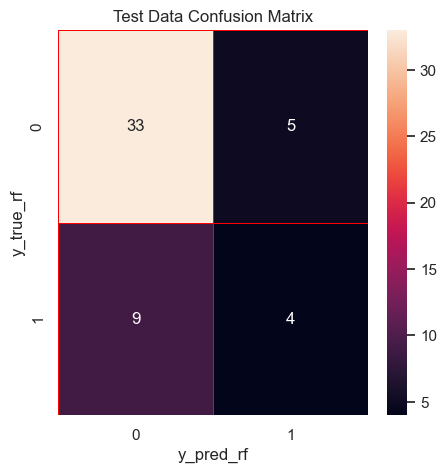

__________________________________________________
--------------------------------------------------
Results for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        38
           1       0.86      0.46      0.60        13

    accuracy                           0.84        51
   macro avg       0.85      0.72      0.75        51
weighted avg       0.85      0.84      0.83        51

Test Accuracy: 84.31%


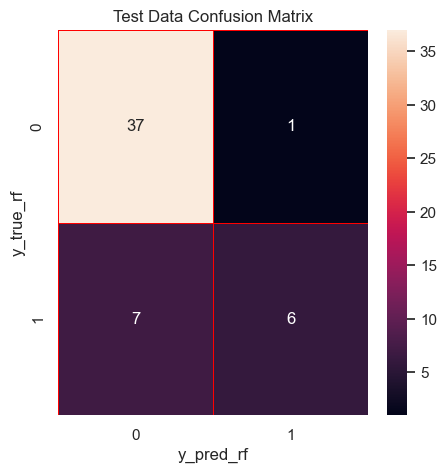

__________________________________________________
--------------------------------------------------
Results for SVC:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        38
           1       0.80      0.31      0.44        13

    accuracy                           0.80        51
   macro avg       0.80      0.64      0.66        51
weighted avg       0.80      0.80      0.77        51

Test Accuracy: 80.39%


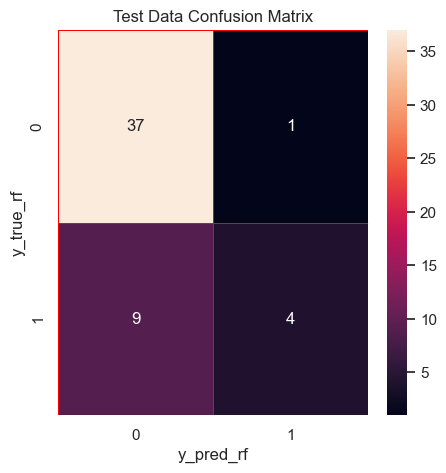

__________________________________________________
--------------------------------------------------
Results for MLPClassifier:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        38
           1       0.50      0.31      0.38        13

    accuracy                           0.75        51
   macro avg       0.65      0.60      0.61        51
weighted avg       0.72      0.75      0.72        51

Test Accuracy: 74.51%


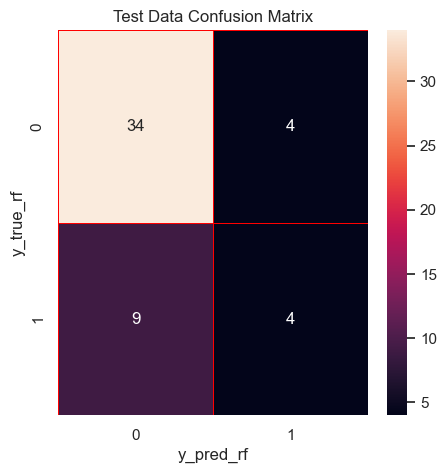

__________________________________________________
--------------------------------------------------
Results for GaussianNB:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        38
           1       0.53      0.62      0.57        13

    accuracy                           0.76        51
   macro avg       0.70      0.72      0.70        51
weighted avg       0.78      0.76      0.77        51

Test Accuracy: 76.47%


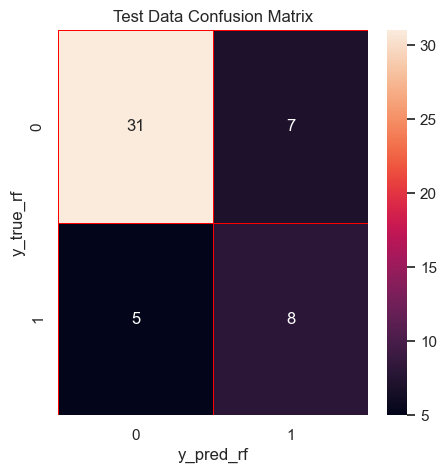

__________________________________________________
--------------------------------------------------
Results for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        38
           1       0.35      0.46      0.40        13

    accuracy                           0.65        51
   macro avg       0.57      0.59      0.57        51
weighted avg       0.68      0.65      0.66        51

Test Accuracy: 64.71%


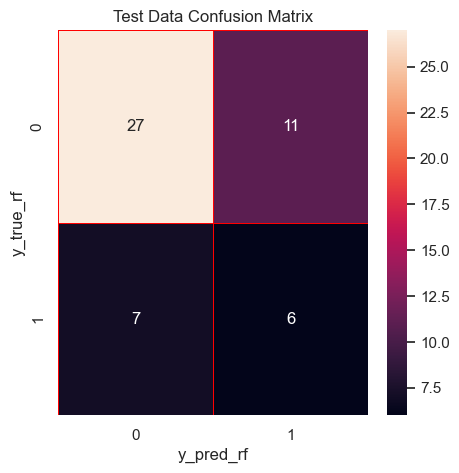

__________________________________________________
--------------------------------------------------
Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        38
           1       0.45      0.38      0.42        13

    accuracy                           0.73        51
   macro avg       0.63      0.61      0.62        51
weighted avg       0.71      0.73      0.72        51

Test Accuracy: 72.55%


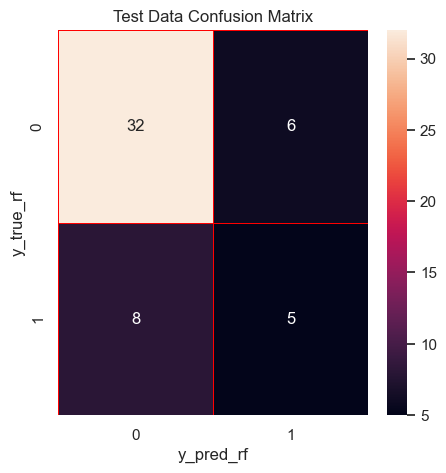

,LogisticRegression,KNeighborsClassifier,SVC,MLPClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
0,0.7255,0.8431,0.8039,0.7451,0.7647,0.6471,0.7255


In [44]:
showResult(classifiers,x_train,y_train['mortalité à un an'],test=[x_test,y_test['mortalité à un an']])

# Without any dimensionality reduction, only tw models gave an accuracy on test data set higher than 80%, KNeighborsClassifier:84.31% and	SVC:80.39%. This are the models we can tune to get the best result

In [45]:
pca6 = PCA(n_components=6)
pca_columns = ['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6']

# Transforming both x_train and x_test into PCA versions.
x_train_pca = pd.DataFrame(pca6.fit_transform(x_train), columns = pca_columns)
x_test_pca = pd.DataFrame(pca6.transform(x_test), columns = pca_columns)

__________________________________________________
--------------------------------------------------
Results for: LogisticRegression
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       151
           1       0.64      0.28      0.39        50

    accuracy                           0.78       201
   macro avg       0.72      0.61      0.63       201
weighted avg       0.76      0.78      0.75       201

Training Accuracy: 0.7811
Training Recall: 0.28


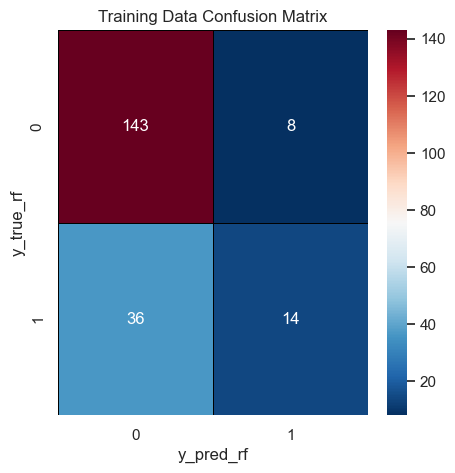

__________________________________________________
--------------------------------------------------
Results for: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       151
           1       0.90      0.52      0.66        50

    accuracy                           0.87       201
   macro avg       0.88      0.75      0.79       201
weighted avg       0.87      0.87      0.85       201

Training Accuracy: 0.8657
Training Recall: 0.52


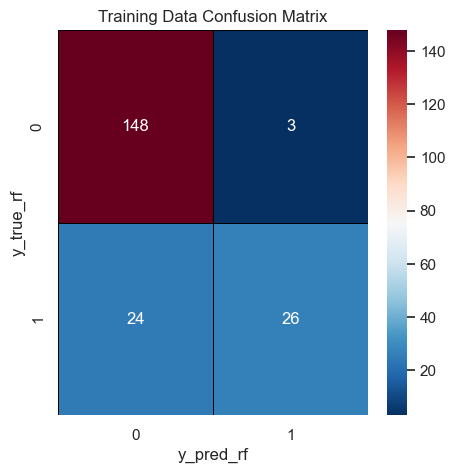

__________________________________________________
--------------------------------------------------
Results for: SVC
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       151
           1       0.95      0.38      0.54        50

    accuracy                           0.84       201
   macro avg       0.89      0.69      0.72       201
weighted avg       0.86      0.84      0.81       201

Training Accuracy: 0.8408
Training Recall: 0.38


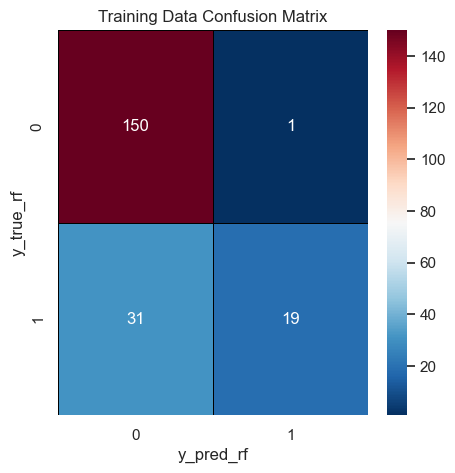

__________________________________________________
--------------------------------------------------
Results for: MLPClassifier
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       151
           1       0.65      0.48      0.55        50

    accuracy                           0.81       201
   macro avg       0.75      0.70      0.71       201
weighted avg       0.79      0.81      0.80       201

Training Accuracy: 0.806
Training Recall: 0.48


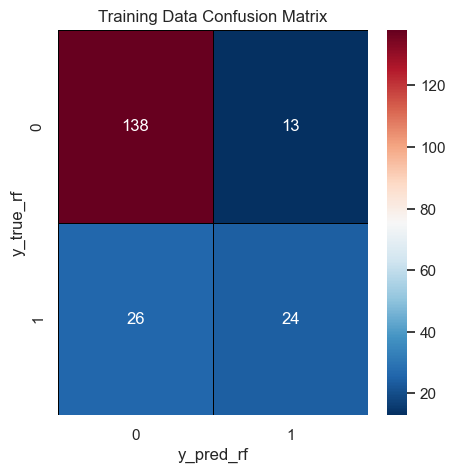

__________________________________________________
--------------------------------------------------
Results for: GaussianNB
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       151
           1       0.63      0.38      0.48        50

    accuracy                           0.79       201
   macro avg       0.73      0.65      0.67       201
weighted avg       0.77      0.79      0.77       201

Training Accuracy: 0.791
Training Recall: 0.38


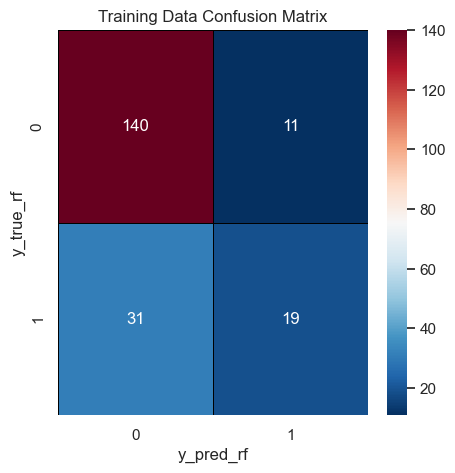

__________________________________________________
--------------------------------------------------
Results for: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


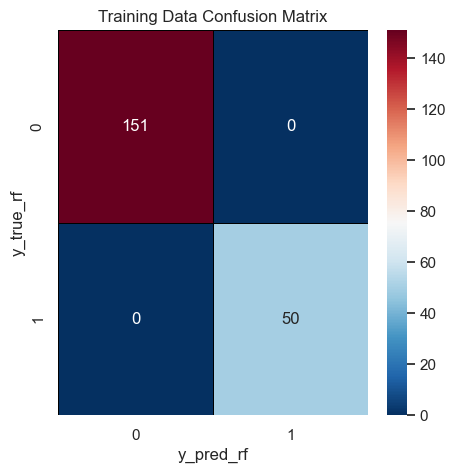

__________________________________________________
--------------------------------------------------
Results for: RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


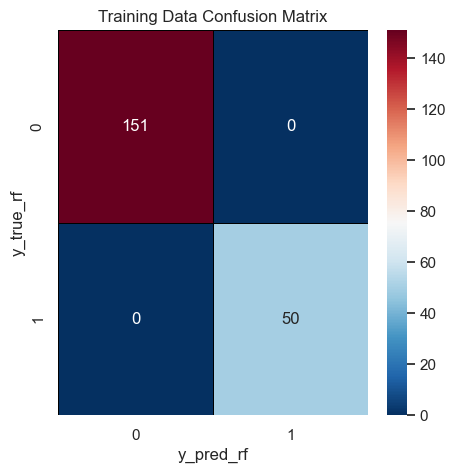

,LogisticRegression,KNeighborsClassifier,SVC,MLPClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
0,0.7811,0.8657,0.8408,0.806,0.791,1.0,1.0


In [46]:
showResult(classifiers,x_train_pca,y_train['mortalité à un an'])

__________________________________________________
--------------------------------------------------
Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        38
           1       0.60      0.46      0.52        13

    accuracy                           0.78        51
   macro avg       0.71      0.68      0.69        51
weighted avg       0.77      0.78      0.77        51

Test Accuracy: 78.43%


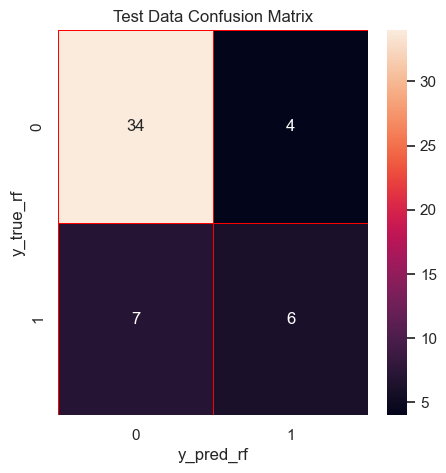

__________________________________________________
--------------------------------------------------
Results for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        38
           1       0.67      0.46      0.55        13

    accuracy                           0.80        51
   macro avg       0.75      0.69      0.71        51
weighted avg       0.79      0.80      0.79        51

Test Accuracy: 80.39%


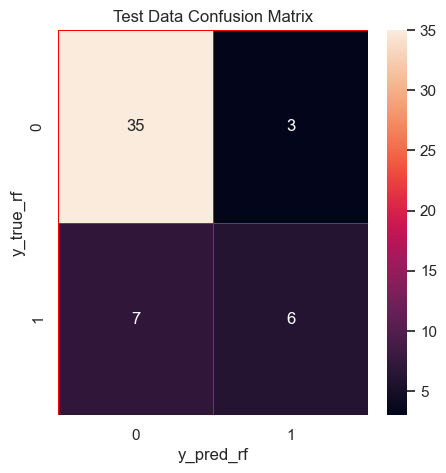

__________________________________________________
--------------------------------------------------
Results for SVC:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        38
           1       0.86      0.46      0.60        13

    accuracy                           0.84        51
   macro avg       0.85      0.72      0.75        51
weighted avg       0.85      0.84      0.83        51

Test Accuracy: 84.31%


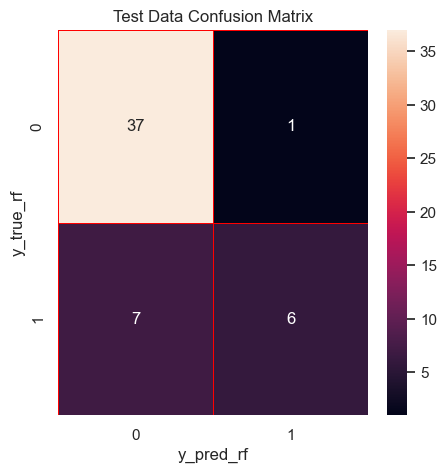

__________________________________________________
--------------------------------------------------
Results for MLPClassifier:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        38
           1       0.50      0.31      0.38        13

    accuracy                           0.75        51
   macro avg       0.65      0.60      0.61        51
weighted avg       0.72      0.75      0.72        51

Test Accuracy: 74.51%


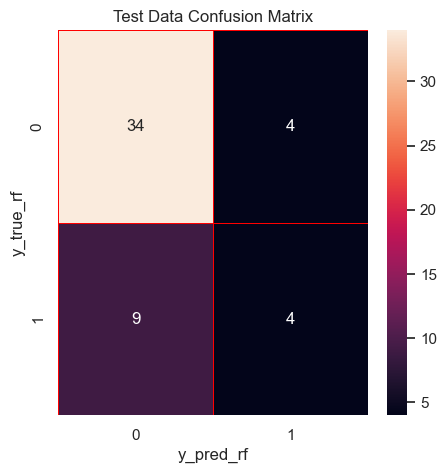

__________________________________________________
--------------------------------------------------
Results for GaussianNB:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.67      0.62      0.64        13

    accuracy                           0.82        51
   macro avg       0.77      0.76      0.76        51
weighted avg       0.82      0.82      0.82        51

Test Accuracy: 82.35%


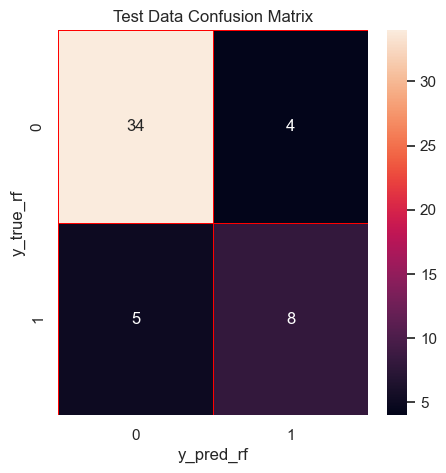

__________________________________________________
--------------------------------------------------
Results for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        38
           1       0.44      0.62      0.52        13

    accuracy                           0.71        51
   macro avg       0.65      0.68      0.65        51
weighted avg       0.75      0.71      0.72        51

Test Accuracy: 70.59%


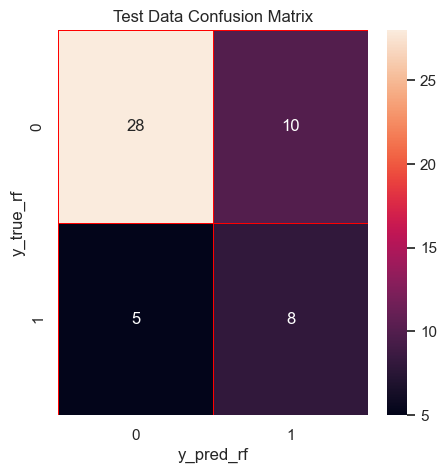

__________________________________________________
--------------------------------------------------
Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        38
           1       0.78      0.54      0.64        13

    accuracy                           0.84        51
   macro avg       0.82      0.74      0.77        51
weighted avg       0.84      0.84      0.83        51

Test Accuracy: 84.31%


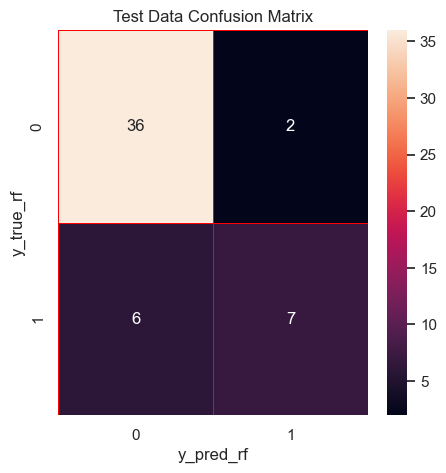

,LogisticRegression,KNeighborsClassifier,SVC,MLPClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
0,0.7843,0.8039,0.8431,0.7451,0.8235,0.7059,0.8431


In [48]:
showResult(classifiers,x_train_pca,y_train['mortalité à un an'],test=[x_test_pca,y_test['mortalité à un an']])

# PCA + TDA + machine

In [49]:
metrics=["bottleneck", "wasserstein", "landscape", "betti", "heat", "silhouette", "persistence_image"]

In [53]:
x_train_tda = tda_tranform(metrics,x_train_pca.to_numpy())
x_test_tda = tda_tranform(metrics,x_test_pca.to_numpy())

__________________________________________________
--------------------------------------------------
Results for: LogisticRegression
              precision    recall  f1-score   support

           0       0.79      0.97      0.88       151
           1       0.75      0.24      0.36        50

    accuracy                           0.79       201
   macro avg       0.77      0.61      0.62       201
weighted avg       0.78      0.79      0.75       201

Training Accuracy: 0.791
Training Recall: 0.24


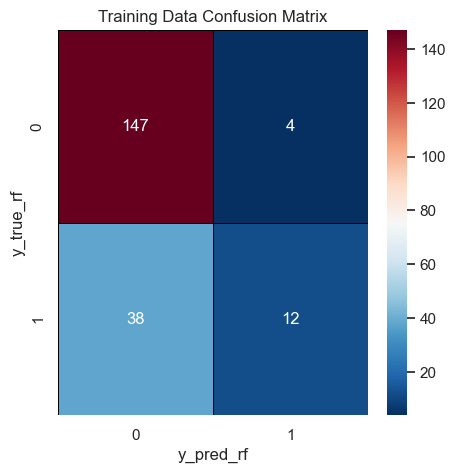

__________________________________________________
--------------------------------------------------
Results for: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       151
           1       0.63      0.34      0.44        50

    accuracy                           0.79       201
   macro avg       0.72      0.64      0.65       201
weighted avg       0.77      0.79      0.76       201

Training Accuracy: 0.7861
Training Recall: 0.34


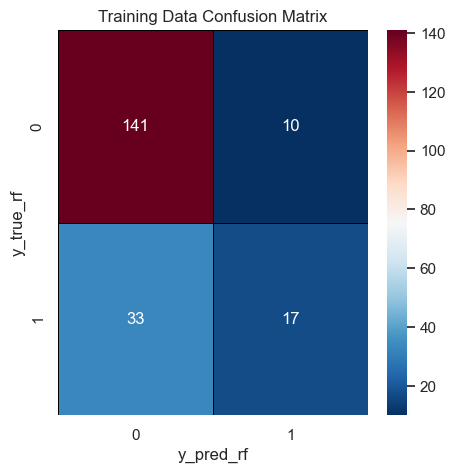

__________________________________________________
--------------------------------------------------
Results for: SVC
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       151
           1       1.00      0.08      0.15        50

    accuracy                           0.77       201
   macro avg       0.88      0.54      0.51       201
weighted avg       0.82      0.77      0.69       201

Training Accuracy: 0.7711
Training Recall: 0.08


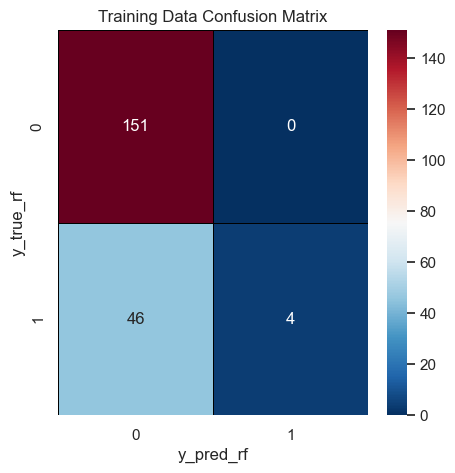

__________________________________________________
--------------------------------------------------
Results for: MLPClassifier
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       151
           1       0.60      0.12      0.20        50

    accuracy                           0.76       201
   macro avg       0.68      0.55      0.53       201
weighted avg       0.73      0.76      0.70       201

Training Accuracy: 0.7612
Training Recall: 0.12


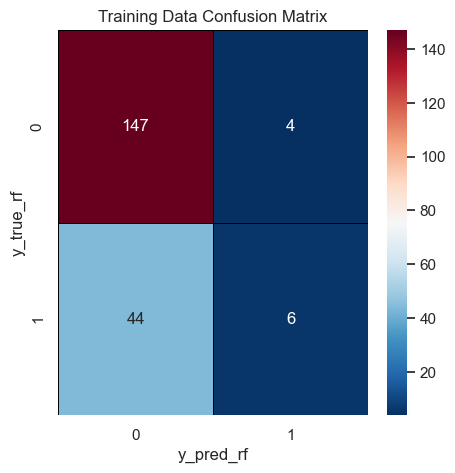

__________________________________________________
--------------------------------------------------
Results for: GaussianNB
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       151
           1       0.69      0.18      0.29        50

    accuracy                           0.78       201
   macro avg       0.74      0.58      0.58       201
weighted avg       0.76      0.78      0.72       201

Training Accuracy: 0.7761
Training Recall: 0.18


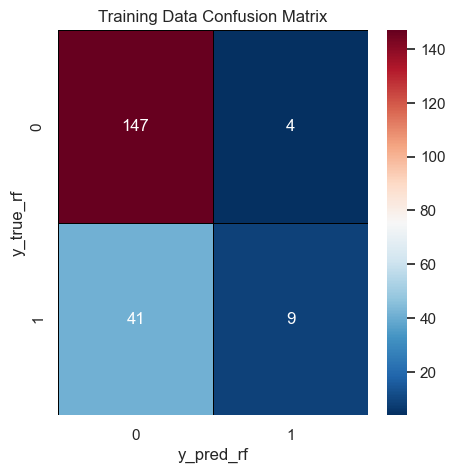

__________________________________________________
--------------------------------------------------
Results for: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


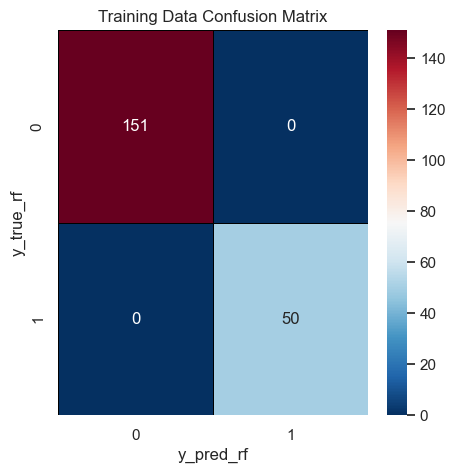

__________________________________________________
--------------------------------------------------
Results for: RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


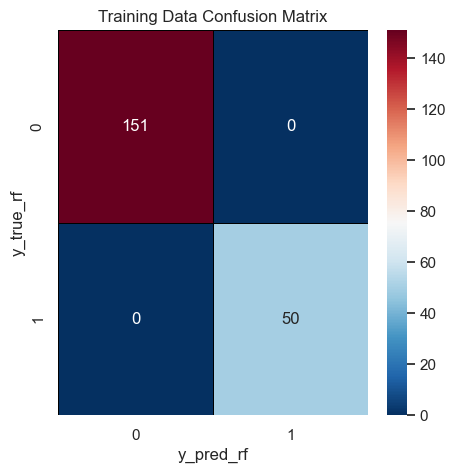

,LogisticRegression,KNeighborsClassifier,SVC,MLPClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
0,0.791,0.7861,0.7711,0.7612,0.7761,1.0,1.0


In [54]:
showResult(classifiers,x_train_tda,y_train['mortalité à un an'])

__________________________________________________
--------------------------------------------------
Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.25      1.00      0.41        13

    accuracy                           0.25        51
   macro avg       0.13      0.50      0.20        51
weighted avg       0.06      0.25      0.10        51

Test Accuracy: 25.49%


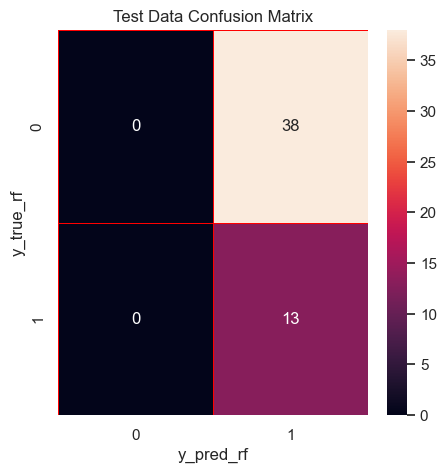

__________________________________________________
--------------------------------------------------
Results for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        38
           1       0.83      0.38      0.53        13

    accuracy                           0.82        51
   macro avg       0.83      0.68      0.71        51
weighted avg       0.83      0.82      0.80        51

Test Accuracy: 82.35%


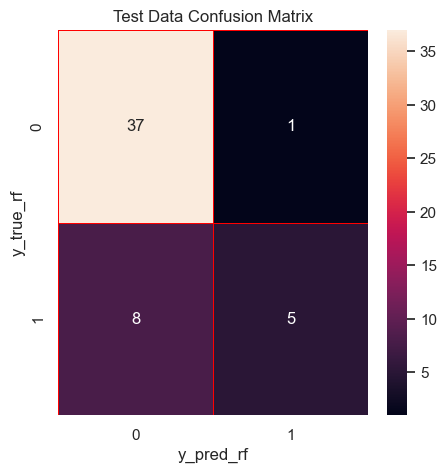

__________________________________________________
--------------------------------------------------
Results for SVC:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        38
           1       0.50      0.08      0.13        13

    accuracy                           0.75        51
   macro avg       0.63      0.53      0.49        51
weighted avg       0.69      0.75      0.67        51

Test Accuracy: 74.51%


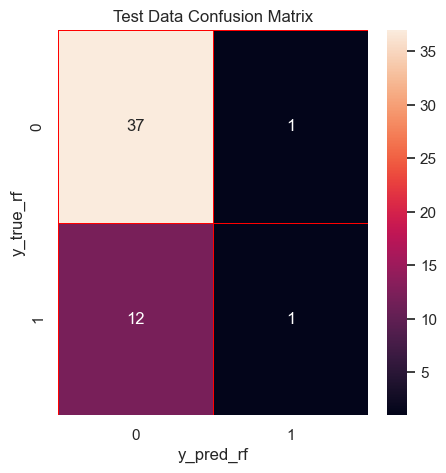

__________________________________________________
--------------------------------------------------
Results for MLPClassifier:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        38
           1       0.50      0.15      0.24        13

    accuracy                           0.75        51
   macro avg       0.63      0.55      0.54        51
weighted avg       0.70      0.75      0.69        51

Test Accuracy: 74.51%


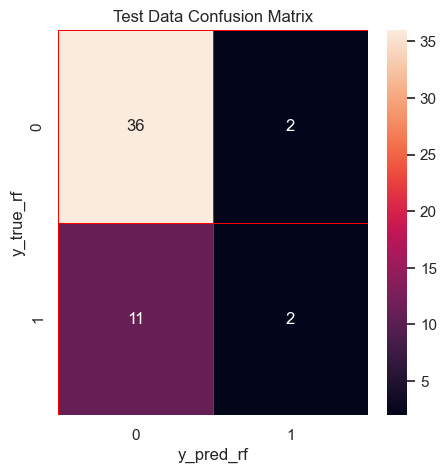

__________________________________________________
--------------------------------------------------
Results for GaussianNB:
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        38
           1       0.67      0.46      0.55        13

    accuracy                           0.80        51
   macro avg       0.75      0.69      0.71        51
weighted avg       0.79      0.80      0.79        51

Test Accuracy: 80.39%


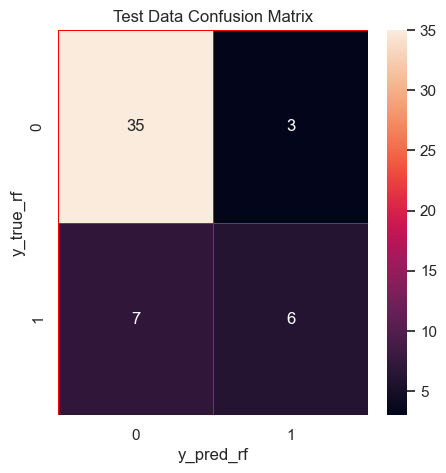

__________________________________________________
--------------------------------------------------
Results for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        38
           1       0.41      0.54      0.47        13

    accuracy                           0.69        51
   macro avg       0.62      0.64      0.62        51
weighted avg       0.72      0.69      0.70        51

Test Accuracy: 68.63%


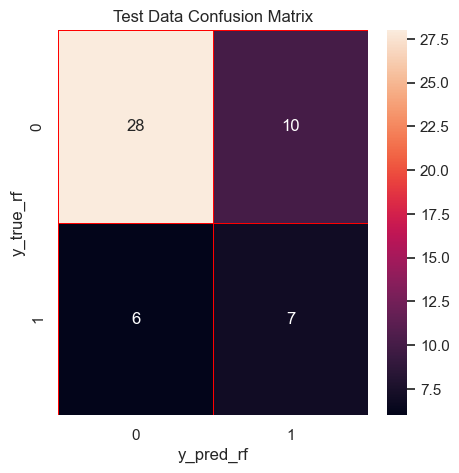

__________________________________________________
--------------------------------------------------
Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        38
           1       0.75      0.46      0.57        13

    accuracy                           0.82        51
   macro avg       0.79      0.70      0.73        51
weighted avg       0.81      0.82      0.81        51

Test Accuracy: 82.35%


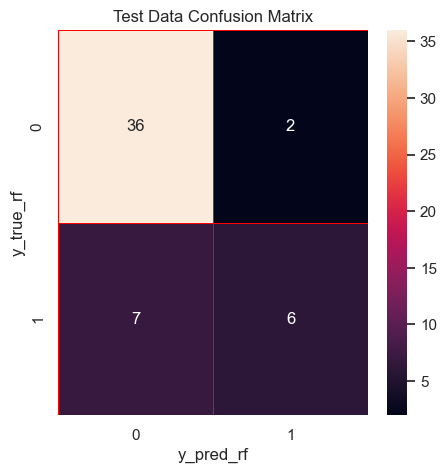

,LogisticRegression,KNeighborsClassifier,SVC,MLPClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
0,0.2549,0.8235,0.7451,0.7451,0.8039,0.6863,0.8235


In [55]:
showResult(classifiers,x_train_tda,y_train['mortalité à un an'],test=[x_test_tda,y_test['mortalité à un an']])

The modeles that perform best are: KNeighborsClassifier 82.35, RandomForestClassifier 82.35 and GaussianNB 80.39

### Tunning RandomForestClassifier

__________________________________________________
--------------------------------------------------
Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        38
           1       0.75      0.46      0.57        13

    accuracy                           0.82        51
   macro avg       0.79      0.70      0.73        51
weighted avg       0.81      0.82      0.81        51

Test Accuracy: 82.35%


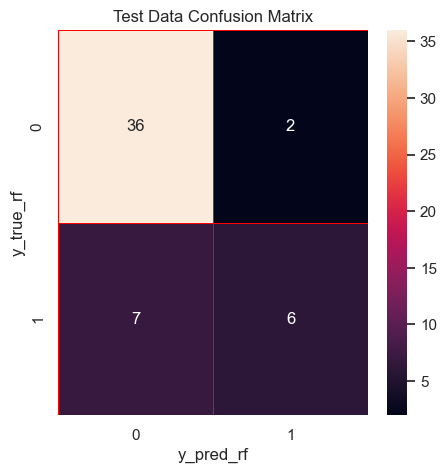

,RandomForestClassifier
0,0.8235


In [57]:
showResult([RandomForestClassifier],x_train_tda,y_train["mortalité à un an"],test=[x_test_tda,y_test["mortalité à un an"]])

In [60]:
rdf_param = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Create a Decision Tree Classifier
clf = RandomForestClassifier()

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=10, n_estimators=150)
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best Score: 0.7712410737486775
Method
RandomForestClassifier
Results for Accuracy Optimized RandomForestClassifier GSCV
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       151
           1       0.84      0.42      0.56        50

    accuracy                           0.84       201
   macro avg       0.84      0.70      0.73       201
weighted avg       0.84      0.84      0.81       201

Training Accuracy: 0.8358
Training Recall: 0.42


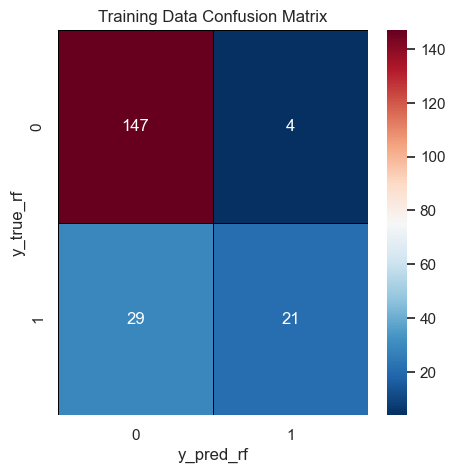

**************************************************
RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=150)
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Best Score: 0.6761768465563531
Method
RandomForestClassifier
Results for Accuracy Optimized RandomForestClassifier GSCV
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       151
           1       0.91      0.42      0.58        50

    accuracy                           0.85       201
   macro avg       0.88      0.70      0.74       201
weighted avg       0.86      0.85      0.82       201

Training Accuracy: 0.8458
Training Recall: 0.42


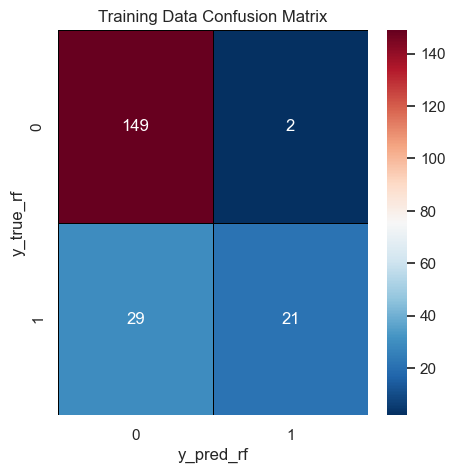

**************************************************
RandomForestClassifier(max_depth=5, n_estimators=150)
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.7958536585365854
Method
RandomForestClassifier
Results for Accuracy Optimized RandomForestClassifier GSCV
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       151
           1       0.95      0.42      0.58        50

    accuracy                           0.85       201
   macro avg       0.90      0.71      0.75       201
weighted avg       0.87      0.85      0.83       201

Training Accuracy: 0.8507
Training Recall: 0.42


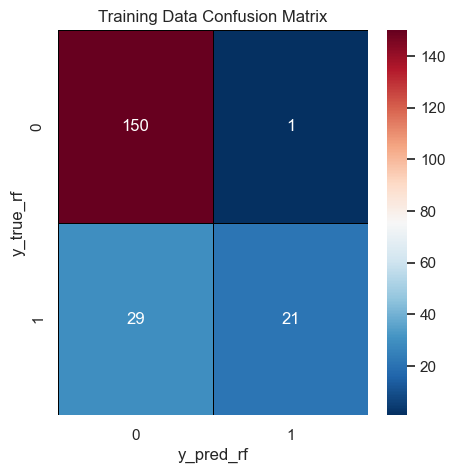

**************************************************
RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=50)
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8007317073170732
Method
RandomForestClassifier
Results for Accuracy Optimized RandomForestClassifier GSCV
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       151
           1       0.95      0.40      0.56        50

    accuracy                           0.85       201
   macro avg       0.89      0.70      0.73       201
weighted avg       0.86      0.85      0.82       201

Training Accuracy: 0.8458
Training Recall: 0.4


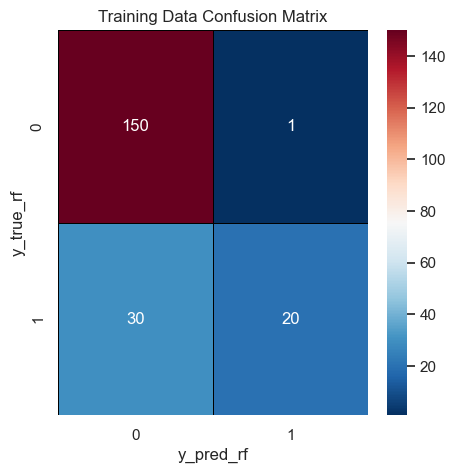

**************************************************
RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)
{'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.4
Method
RandomForestClassifier
Results for Accuracy Optimized RandomForestClassifier GSCV
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       151
           1       0.83      0.48      0.61        50

    accuracy                           0.85       201
   macro avg       0.84      0.72      0.76       201
weighted avg       0.84      0.85      0.83       201

Training Accuracy: 0.8458
Training Recall: 0.48


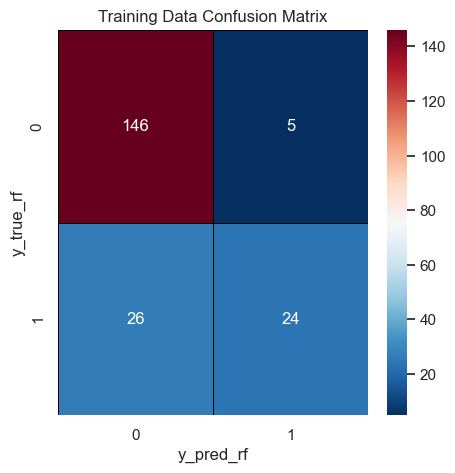

In [62]:
rfc_gscv_weighted,y_pred_weighted=modelTunning(rdf_param,x_train_tda,y_train["mortalité à un an"],clf,scoring='f1_weighted')
print("*"*50)
rfc_gscv_macro,y_pred_macro=modelTunning(rdf_param,x_train_tda,y_train["mortalité à un an"],clf,scoring='f1_macro')
print("*"*50)
rfc_gscv_micro,y_pred_micro=modelTunning(rdf_param,x_train_tda,y_train["mortalité à un an"],clf,scoring='f1_micro')
print("*"*50)
rfc_gscv_accuracy,y_pred_accuracy=modelTunning(rdf_param,x_train_tda,y_train["mortalité à un an"],clf,scoring='accuracy')
print("*"*50)
rfc_gscv_recall,y_pred_recall=modelTunning(rdf_param,x_train_tda,y_train["mortalité à un an"],clf,scoring='recall')

__________________________________________________
--------------------------------------------------
Results for: 0.2
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       151
           1       0.62      0.96      0.75        50

    accuracy                           0.84       201
   macro avg       0.80      0.88      0.82       201
weighted avg       0.89      0.84      0.85       201

Training Accuracy: 0.8408
Training Recall: 0.96


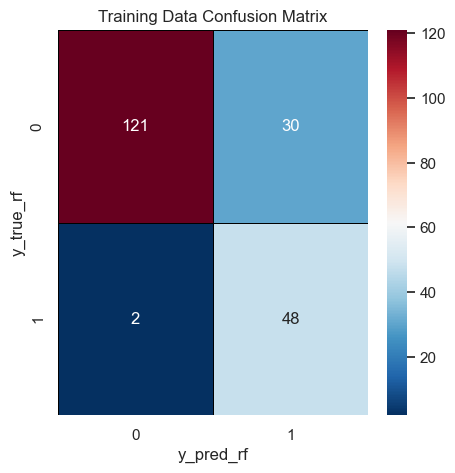

__________________________________________________
--------------------------------------------------
Results for: 0.25
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       151
           1       0.66      0.86      0.75        50

    accuracy                           0.86       201
   macro avg       0.81      0.86      0.82       201
weighted avg       0.88      0.86      0.86       201

Training Accuracy: 0.8557
Training Recall: 0.86


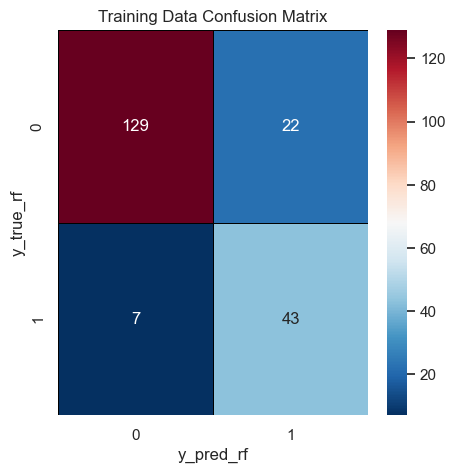

__________________________________________________
--------------------------------------------------
Results for: 0.3
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       151
           1       0.70      0.66      0.68        50

    accuracy                           0.85       201
   macro avg       0.80      0.78      0.79       201
weighted avg       0.84      0.85      0.84       201

Training Accuracy: 0.8458
Training Recall: 0.66


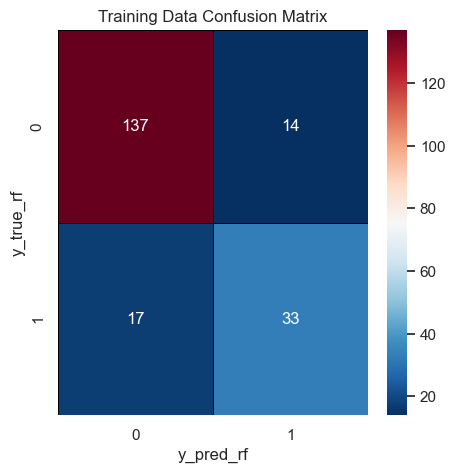

__________________________________________________
--------------------------------------------------
Results for: 0.35
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       151
           1       0.82      0.64      0.72        50

    accuracy                           0.88       201
   macro avg       0.85      0.80      0.82       201
weighted avg       0.87      0.88      0.87       201

Training Accuracy: 0.8756
Training Recall: 0.64


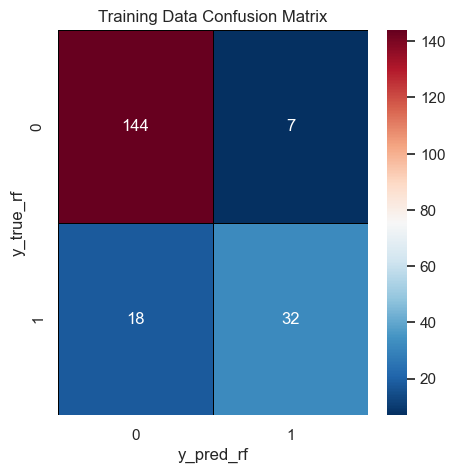

__________________________________________________
--------------------------------------------------
Results for: 0.4
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       151
           1       0.88      0.58      0.70        50

    accuracy                           0.88       201
   macro avg       0.88      0.78      0.81       201
weighted avg       0.88      0.88      0.87       201

Training Accuracy: 0.8756
Training Recall: 0.58


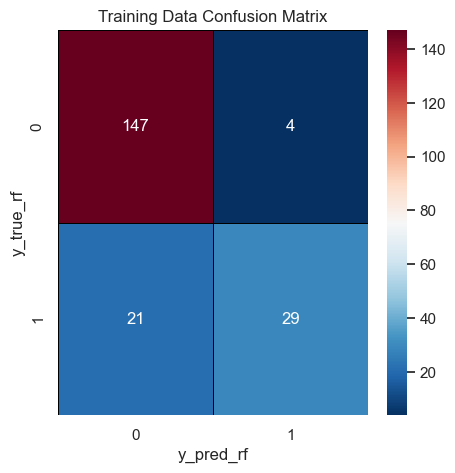

__________________________________________________
--------------------------------------------------
Results for: 0.45
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       151
           1       0.92      0.48      0.63        50

    accuracy                           0.86       201
   macro avg       0.89      0.73      0.77       201
weighted avg       0.87      0.86      0.84       201

Training Accuracy: 0.8607
Training Recall: 0.48


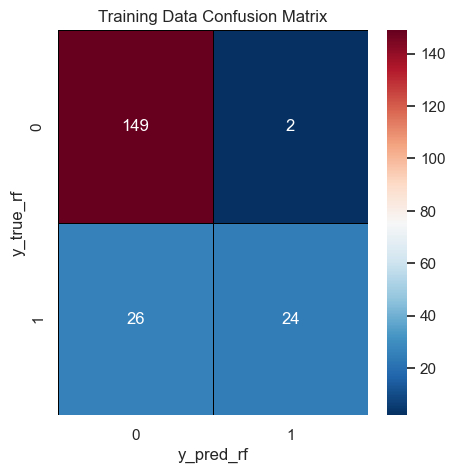

__________________________________________________
--------------------------------------------------
Results for: 0.5
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       151
           1       0.95      0.42      0.58        50

    accuracy                           0.85       201
   macro avg       0.90      0.71      0.75       201
weighted avg       0.87      0.85      0.83       201

Training Accuracy: 0.8507
Training Recall: 0.42


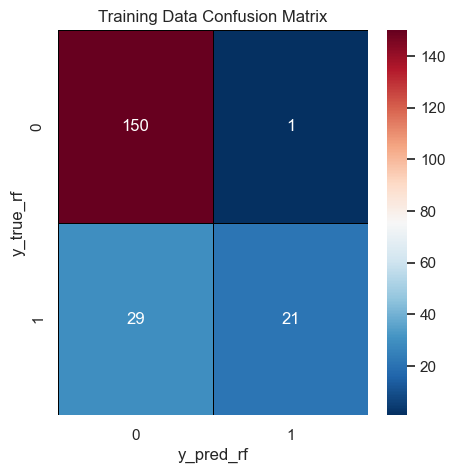

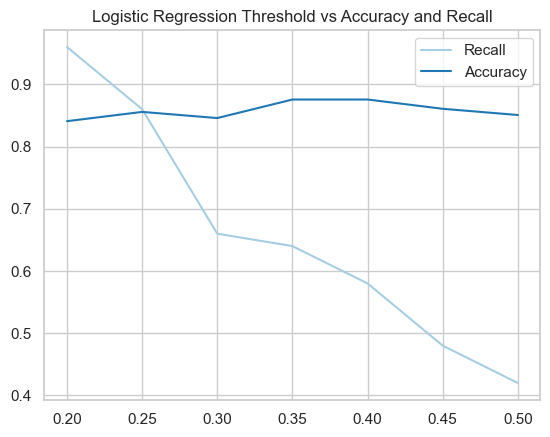

In [63]:
best_threshold(rfc_gscv_micro,x_train_tda,y_train.iloc[:, -2])

Results for: RandomForestclassifier Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        38
           1       0.64      0.54      0.58        13

    accuracy                           0.80        51
   macro avg       0.74      0.72      0.73        51
weighted avg       0.80      0.80      0.80        51

Training Accuracy: 0.8039
Training Recall: 0.5385


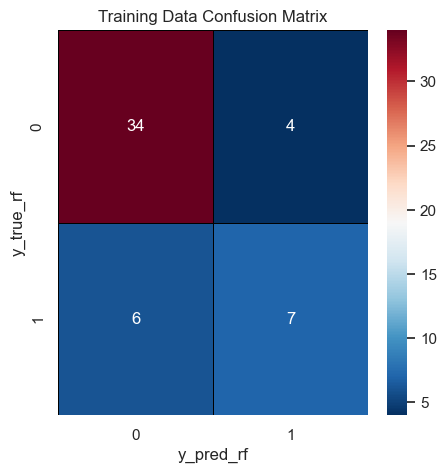

Results for: RandomForestclassifier Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        38
           1       0.75      0.46      0.57        13

    accuracy                           0.82        51
   macro avg       0.79      0.70      0.73        51
weighted avg       0.81      0.82      0.81        51

Training Accuracy: 0.8235
Training Recall: 0.4615


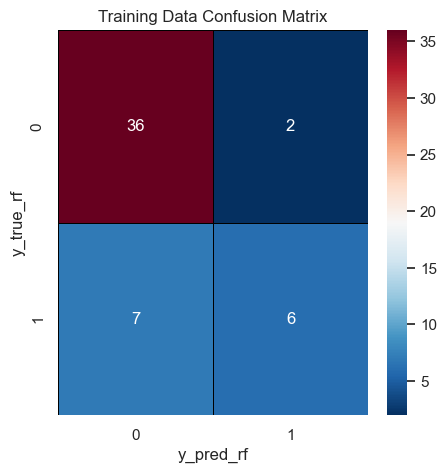

In [66]:
my_thresh = 0.4

y_pred_test_thresh = (rfc_gscv_micro.predict_proba(x_test_tda)[:,1] >= my_thresh).astype(bool)
y_pred = rfc_gscv_micro.predict(x_test_tda)

final_log=classification_results(x_test_tda,y_test["mortalité à un an"],y_pred_test_thresh,rfc_gscv_micro, title="RandomForestclassifier Accuracy Optimized Model")
final_log=classification_results(x_test_tda,y_test["mortalité à un an"],y_pred,rfc_gscv_micro, title="RandomForestclassifier Accuracy Optimized Model")


### Tunning KNeighborsClassifier

__________________________________________________
--------------------------------------------------
Results for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        38
           1       0.83      0.38      0.53        13

    accuracy                           0.82        51
   macro avg       0.83      0.68      0.71        51
weighted avg       0.83      0.82      0.80        51

Test Accuracy: 82.35%


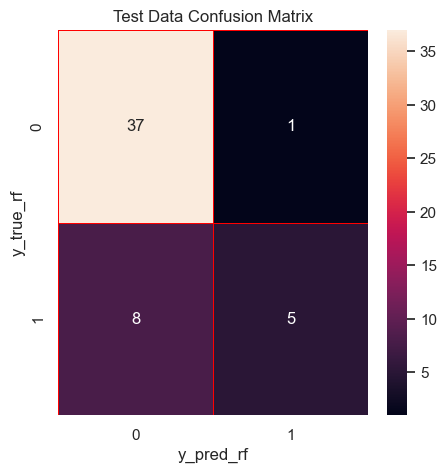

,KNeighborsClassifier
0,0.8235


In [67]:
showResult([KNeighborsClassifier],x_train_tda,y_train["mortalité à un an"],test=[x_test_tda,y_test["mortalité à un an"]])

In [103]:
knn_param = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # L1 and L2 distances
    'leaf_size': [10, 20, 30, 40],  # Additional parameter: leaf_size
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Additional parameter: algorithm
}
cls = KNeighborsClassifier()

KNeighborsClassifier(leaf_size=10, n_neighbors=9, weights='distance')
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Best Score: 0.7455535330284254
Method
KNeighborsClassifier
Results for Accuracy Optimized KNeighborsClassifier GSCV
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


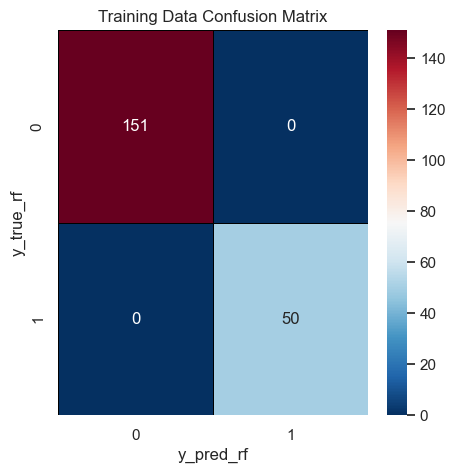

**************************************************
KNeighborsClassifier(leaf_size=10, n_neighbors=7, weights='distance')
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Best Score: 0.624568842651368
Method
KNeighborsClassifier
Results for Accuracy Optimized KNeighborsClassifier GSCV
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


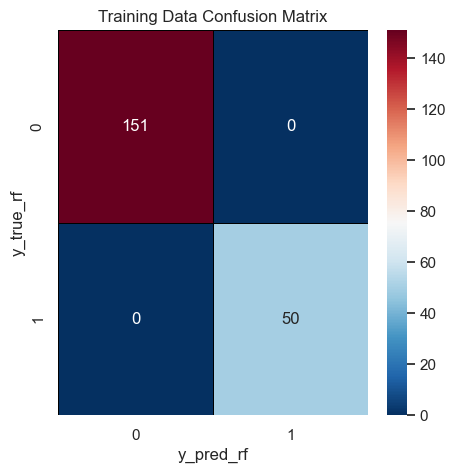

**************************************************
KNeighborsClassifier(leaf_size=10, n_neighbors=9, weights='distance')
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Best Score: 0.7807317073170731
Method
KNeighborsClassifier
Results for Accuracy Optimized KNeighborsClassifier GSCV
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


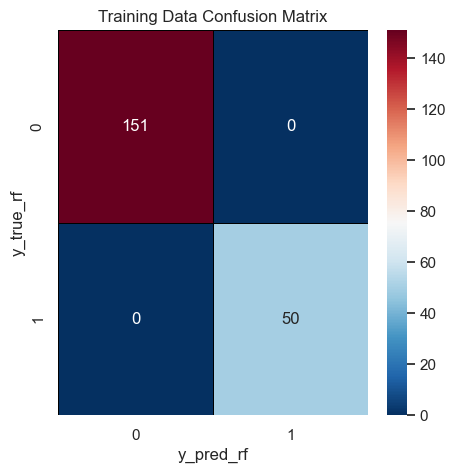

**************************************************
KNeighborsClassifier(leaf_size=10, n_neighbors=9, weights='distance')
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Best Score: 0.7807317073170731
Method
KNeighborsClassifier
Results for Accuracy Optimized KNeighborsClassifier GSCV
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


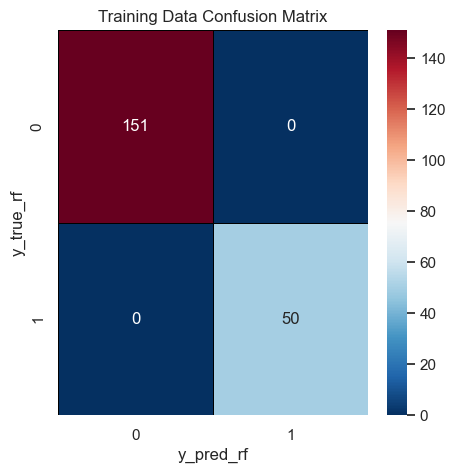

**************************************************
KNeighborsClassifier(leaf_size=10, n_neighbors=3, weights='distance')
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best Score: 0.32
Method
KNeighborsClassifier
Results for Accuracy Optimized KNeighborsClassifier GSCV
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


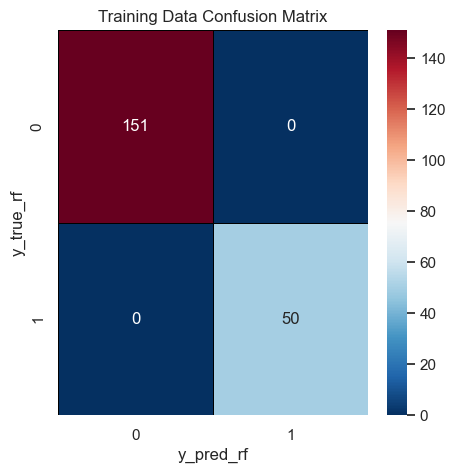

In [104]:
knn_gscv_weighted,y_pred_weighted=modelTunning(knn_param,x_train_tda,y_train["mortalité à un an"],cls,scoring='f1_weighted')
print("*"*50)
knn_gscv_macro,y_pred_macro=modelTunning(knn_param,x_train_tda,y_train["mortalité à un an"],cls,scoring='f1_macro')
print("*"*50)
knn_gscv_micro,y_pred_micro=modelTunning(knn_param,x_train_tda,y_train["mortalité à un an"],cls,scoring='f1_micro')
print("*"*50)
knn_gscv_accuracy,y_pred_accuracy=modelTunning(knn_param,x_train_tda,y_train["mortalité à un an"],cls,scoring='accuracy')
print("*"*50)
knn_gscv_recall,y_pred_recall=modelTunning(knn_param,x_train_tda,y_train["mortalité à un an"],cls,scoring='recall')

In [91]:
#best_threshold(knn_gscv_macro,x_train_tda,y_train.iloc[:, -2])

Results for: KNeighborsClassifier Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        38
           1       0.86      0.46      0.60        13

    accuracy                           0.84        51
   macro avg       0.85      0.72      0.75        51
weighted avg       0.85      0.84      0.83        51

Training Accuracy: 0.8431
Training Recall: 0.4615


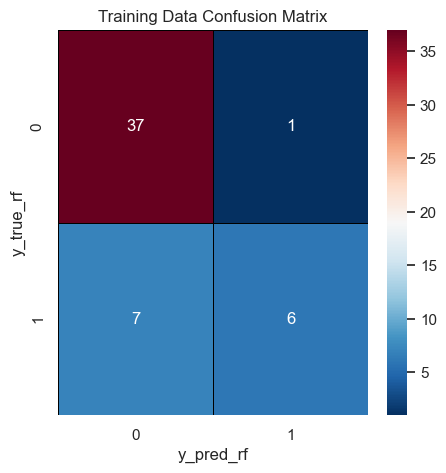

In [105]:
#my_thresh = 0.20

#y_pred_test_thresh = (knn_gscv_macro.predict_proba(x_test_tda)[:,1] >= my_thresh).astype(bool)
y_pred = knn_gscv_macro.predict(x_test_tda)

#final_log=classification_results(x_test_tda,y_test["mortalité à un an"],y_pred_test_thresh,knn_gscv_accuracy, title="KNeighborsClassifier Accuracy Optimized Model")
final_log=classification_results(x_test_tda,y_test["mortalité à un an"],y_pred,knn_gscv_macro, title="KNeighborsClassifier Accuracy Optimized Model")


### GaussianNB

__________________________________________________
--------------------------------------------------
Results for GaussianNB:
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        38
           1       0.67      0.46      0.55        13

    accuracy                           0.80        51
   macro avg       0.75      0.69      0.71        51
weighted avg       0.79      0.80      0.79        51

Test Accuracy: 80.39%


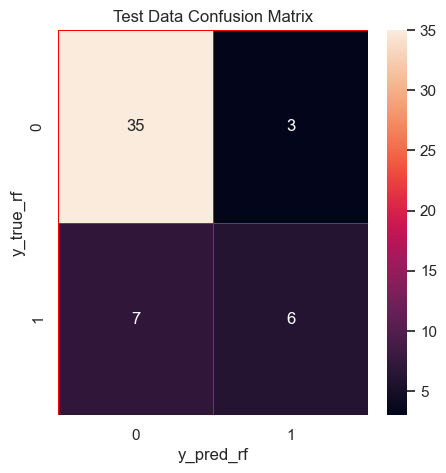

,GaussianNB
0,0.8039


In [106]:
showResult([GaussianNB],x_train_tda,y_train["mortalité à un an"],test=[x_test_tda,y_test["mortalité à un an"]])

In [110]:
gnb_param = {'var_smoothing': np.logspace(start=-15, stop=-1, num=100)}
cls = GaussianNB()

GaussianNB(var_smoothing=1e-15)
{'var_smoothing': 1e-15}
Best Score: 0.7242403278356939
Method
GaussianNB
Results for Accuracy Optimized GaussianNB GSCV
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       151
           1       0.69      0.18      0.29        50

    accuracy                           0.78       201
   macro avg       0.74      0.58      0.58       201
weighted avg       0.76      0.78      0.72       201

Training Accuracy: 0.7761
Training Recall: 0.18


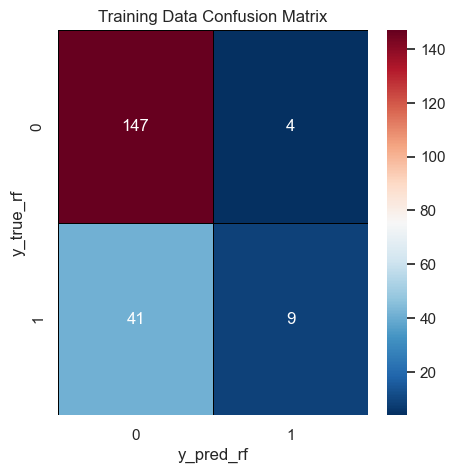

**************************************************
GaussianNB(var_smoothing=1e-15)
{'var_smoothing': 1e-15}
Best Score: 0.5805914274490046
Method
GaussianNB
Results for Accuracy Optimized GaussianNB GSCV
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       151
           1       0.69      0.18      0.29        50

    accuracy                           0.78       201
   macro avg       0.74      0.58      0.58       201
weighted avg       0.76      0.78      0.72       201

Training Accuracy: 0.7761
Training Recall: 0.18


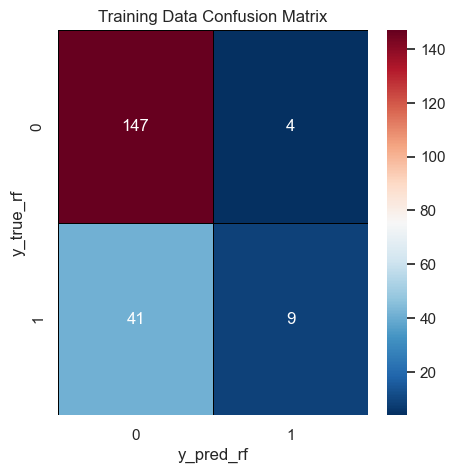

**************************************************
GaussianNB(var_smoothing=1e-15)
{'var_smoothing': 1e-15}
Best Score: 0.7760975609756098
Method
GaussianNB
Results for Accuracy Optimized GaussianNB GSCV
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       151
           1       0.69      0.18      0.29        50

    accuracy                           0.78       201
   macro avg       0.74      0.58      0.58       201
weighted avg       0.76      0.78      0.72       201

Training Accuracy: 0.7761
Training Recall: 0.18


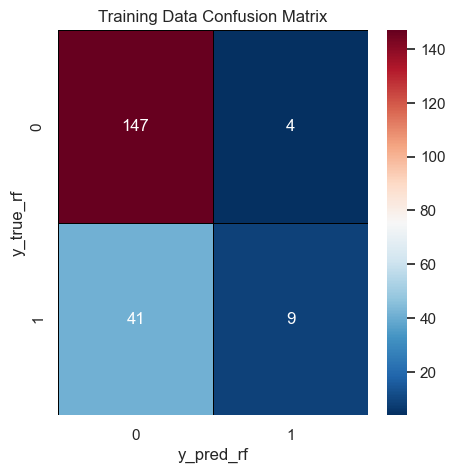

**************************************************
GaussianNB(var_smoothing=1e-15)
{'var_smoothing': 1e-15}
Best Score: 0.7760975609756098
Method
GaussianNB
Results for Accuracy Optimized GaussianNB GSCV
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       151
           1       0.69      0.18      0.29        50

    accuracy                           0.78       201
   macro avg       0.74      0.58      0.58       201
weighted avg       0.76      0.78      0.72       201

Training Accuracy: 0.7761
Training Recall: 0.18


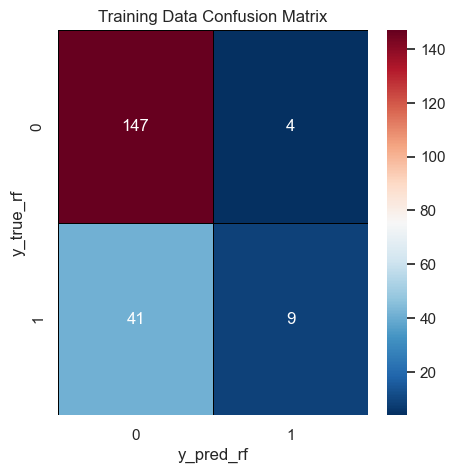

**************************************************
GaussianNB(var_smoothing=1e-15)
{'var_smoothing': 1e-15}
Best Score: 0.2
Method
GaussianNB
Results for Accuracy Optimized GaussianNB GSCV
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       151
           1       0.69      0.18      0.29        50

    accuracy                           0.78       201
   macro avg       0.74      0.58      0.58       201
weighted avg       0.76      0.78      0.72       201

Training Accuracy: 0.7761
Training Recall: 0.18


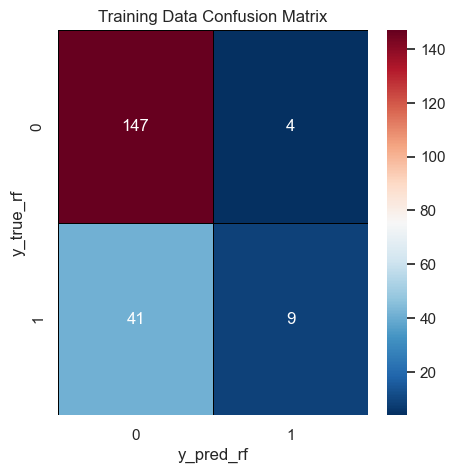

In [111]:
gnb_gscv_weighted,y_pred_weighted=modelTunning(gnb_param,x_train_tda,y_train["mortalité à un an"],cls,scoring='f1_weighted')
print("*"*50)
gnb_gscv_macro,y_pred_macro=modelTunning(gnb_param,x_train_tda,y_train["mortalité à un an"],cls,scoring='f1_macro')
print("*"*50)
gnb_gscv_micro,y_pred_micro=modelTunning(gnb_param,x_train_tda,y_train["mortalité à un an"],cls,scoring='f1_micro')
print("*"*50)
gnb_gscv_accuracy,y_pred_accuracy=modelTunning(gnb_param,x_train_tda,y_train["mortalité à un an"],cls,scoring='accuracy')
print("*"*50)
gnb_gscv_recall,y_pred_recall=modelTunning(gnb_param,x_train_tda,y_train["mortalité à un an"],cls,scoring='recall')

Results for: GaussianNB Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        38
           1       0.67      0.46      0.55        13

    accuracy                           0.80        51
   macro avg       0.75      0.69      0.71        51
weighted avg       0.79      0.80      0.79        51

Training Accuracy: 0.8039
Training Recall: 0.4615


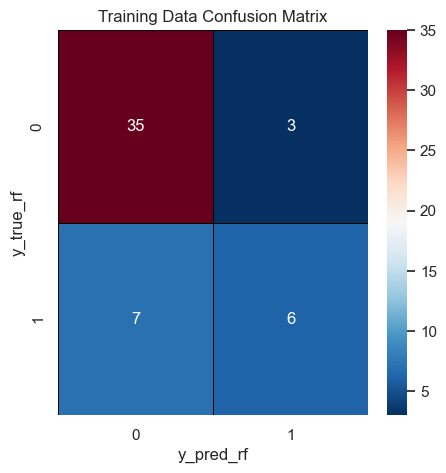

In [109]:

#y_pred_test_thresh = (knn_gscv_macro.predict_proba(x_test_tda)[:,1] >= my_thresh).astype(bool)
y_pred = gnb_gscv_accuracy.predict(x_test_tda)

#final_log=classification_results(x_test_tda,y_test["mortalité à un an"],y_pred_test_thresh,knn_gscv_accuracy, title="KNeighborsClassifier Accuracy Optimized Model")
final_log=classification_results(x_test_tda,y_test["mortalité à un an"],y_pred,gnb_gscv_accuracy, title="GaussianNB Accuracy Optimized Model")


GaussianNB's performance is not  significantly influenced by hyperparameter tuning

# PCA + TDA + reinforcement

In [8]:
# TDA + classifier+ reinforcement
# preservation de tda pour la metric x, tu gagne de la valeur , sinon tu perd de la valeur
# recompensr la machine, avec une valeur de perte, ou separation entre les different bloc de la machine avec
#les differents block neuronal
# pip install gym

#taelcore + machine

PCA + machine


Taelcore + machine

PCA + TDA + machine


PCA + TDA + reinforcement

PCA + TDA + reinforcement comparer avec Taelcore + machine